We have stored the NAAMES data to Azure Cloud Storage and to read it we will use the Python API. 

ifcb storage account -> naames container -> NAAMES_ml folder

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
import imageio

In [3]:
import getpass

In [4]:
pip install -r ../requirements.txt

  Using cached opencv_python_headless-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.8 MB)
  Using cached grpcio-1.32.0-cp38-cp38-manylinux2014_x86_64.whl (3.8 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached wrapt-1.12.1-py3-none-any.whl
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
  Attempting uninstall: grpcio
    

In [5]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

2022-05-10 16:31:46.295993: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [6]:
import tensorflow as tf
import datetime

In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [8]:
import azure.storage.blob

In [9]:
import sys
sys.path.append('../')

In [10]:
import imp

In [11]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [12]:
import data_utils as du

In [13]:
imp.reload(du)

<module 'data_utils' from '/home/jovyan/ifcb-utopia/ml-workflow/notebooks/../data_utils.py'>

In [14]:
# here we connect to the Azure blob storage
connection_string = getpass.getpass()

 ·····························································································································································································


In [15]:
container_client = azure.storage.blob.ContainerClient.from_connection_string(
    connection_string, container_name="naames"
)

In [16]:
# we limit to a subfolder to test the functionality
#blobs_list = container_client.list_blobs(name_starts_with='NAAMES_ml/D20151102T161705_IFCB107')

In [17]:
container_name = 'naames'
account_name = 'ifcbwesteurope'

In [18]:
url_prefix = f"https://{account_name}.blob.core.windows.net/{container_name}/"

In [19]:
url_prefix

'https://ifcbwesteurope.blob.core.windows.net/naames/'

In [20]:
csv_url = url_prefix + 'image-file-directory.csv'

In [21]:
inventory_df = pd.read_csv(csv_url)
inventory_df

,file_name,class_raw,high_group,missing_high_group,id,lat,long,Area,Biovolume,ConvexArea,...,ScatInt,FluoInt,ScatPeak,FluoPeak,NumberOfROIinTrigger,missing_meta_data,ESDA_exclude,excluded_1,set,binary_label
0,IFCB107D20151104T112022P00433_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T112022P00433,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
1,IFCB107D20151104T114135P00194_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00194,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
2,IFCB107D20151104T114135P00246_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00246,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
3,IFCB107D20151104T124515P00027_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T124515P00027,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
4,IFCB107D20151105T174918P00074_Dinophyceae.png,Dinophyceae,Dinoflagellate,False,IFCB107D20151105T174918P00074,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998895,IFCB107D20180412T010113P00020_Ceratium.png,Ceratium,Dinoflagellate,False,IFCB107D20180412T010113P00020,40.348,-68.296,1507.093426,20001.839825,2501.816609,...,1.09682,0.36801,3.33541,1.37789,1.0,False,False,0,train,plankton
1998896,IFCB107D20180412T012434P00137_Ditylum.png,Ditylum,Diatom,False,IFCB107D20180412T012434P00137,40.324,-68.387,4811.591696,91203.058213,6707.612457,...,3.49742,1.77298,3.35693,3.31523,1.0,False,False,0,train,plankton
1998897,IFCB107D20180412T012434P00348_Ditylum.png,Ditylum,Diatom,False,IFCB107D20180412T012434P00348,40.324,-68.387,2446.626298,30443.529921,3317.560554,...,2.46922,0.90272,3.35900,2.21282,1.0,False,False,0,train,plankton
1998898,IFCB107D20180412T021117P00330_Ceratium.png,Ceratium,Dinoflagellate,False,IFCB107D20180412T021117P00330,40.273,-68.571,1500.951557,19808.704267,2787.802768,...,0.61201,0.04541,2.85538,0.37142,1.0,False,False,0,train,plankton


In [22]:
# subsample the full dataframe for workflow testing
#df_subsample = inventory_df.iloc[:10000,]
df_subsample = inventory_df.iloc[:100000,]
#df_subsample = inventory_df

In [23]:
df_subsample

,file_name,class_raw,high_group,missing_high_group,id,lat,long,Area,Biovolume,ConvexArea,...,ScatInt,FluoInt,ScatPeak,FluoPeak,NumberOfROIinTrigger,missing_meta_data,ESDA_exclude,excluded_1,set,binary_label
0,IFCB107D20151104T112022P00433_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T112022P00433,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
1,IFCB107D20151104T114135P00194_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00194,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
2,IFCB107D20151104T114135P00246_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T114135P00246,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
3,IFCB107D20151104T124515P00027_Unicellular.png,Unicellular,Other,False,IFCB107D20151104T124515P00027,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
4,IFCB107D20151105T174918P00074_Dinophyceae.png,Dinophyceae,Dinoflagellate,False,IFCB107D20151105T174918P00074,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,False,1,train,plankton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,IFCB107D20151127T083440P01994_Unicellular.png,Unicellular,Other,False,IFCB107D20151127T083440P01994,42.629,-49.9175,23.356401,74.954929,28.806228,...,0.00212,-0.00030,0.01078,0.01173,1.0,False,True,1,train,plankton
99996,IFCB107D20151127T083440P02110_Unicellular.png,Unicellular,Other,False,IFCB107D20151127T083440P02110,42.629,-49.9175,26.730104,84.466671,29.584775,...,0.00219,0.00257,0.01091,0.10722,1.0,False,True,1,train,plankton
99997,IFCB107D20151127T083440P02176_Unicellular.png,Unicellular,Other,False,IFCB107D20151127T083440P02176,42.629,-49.9175,28.460208,71.208871,39.359862,...,0.00240,0.00321,0.01092,0.11352,1.0,False,True,1,train,plankton
99998,IFCB107D20151127T083440P02196_Unicellular.png,Unicellular,Other,False,IFCB107D20151127T083440P02196,42.629,-49.9175,23.788927,67.241625,27.681661,...,0.00226,0.00261,0.01094,0.13136,1.0,False,True,1,train,plankton


## create png_path column and 3-column dataframe

In [24]:
# add a column of the png path to the df dataframe
df_subsample['png_path'] = df_subsample['id'].apply(lambda row : du.buildPNGsName(row))

/tmp/ipykernel_354/1727142688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subsample['png_path'] = df_subsample['id'].apply(lambda row : du.buildPNGsName(row))


In [25]:
# create a dataframe with just the columns of png_path and high_group
df_files_labels = df_subsample[['png_path', 'high_group']]

In [26]:
# add a column called full_path 
df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join(url_prefix,'NAAMES_ml', row))

/tmp/ipykernel_354/1825214936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join(url_prefix,'NAAMES_ml', row))


In [27]:
# THIS IS A TEST FOR SPEED OF GENERATOR ON LOCAL FILES VS BLOB
# add a column called full_path
#df_files_labels['full_path'] = df_files_labels['png_path'].apply(lambda row : os.path.join('..', row))

In [28]:
df_files_labels

,png_path,high_group,full_path
0,D20151104T112022_IFCB107/IFCB107D20151104T1120...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
1,D20151104T114135_IFCB107/IFCB107D20151104T1141...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
2,D20151104T114135_IFCB107/IFCB107D20151104T1141...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
3,D20151104T124515_IFCB107/IFCB107D20151104T1245...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
4,D20151105T174918_IFCB107/IFCB107D20151105T1749...,Dinoflagellate,https://ifcbwesteurope.blob.core.windows.net/n...
...,...,...,...
99995,D20151127T083440_IFCB107/IFCB107D20151127T0834...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
99996,D20151127T083440_IFCB107/IFCB107D20151127T0834...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
99997,D20151127T083440_IFCB107/IFCB107D20151127T0834...,Other,https://ifcbwesteurope.blob.core.windows.net/n...
99998,D20151127T083440_IFCB107/IFCB107D20151127T0834...,Other,https://ifcbwesteurope.blob.core.windows.net/n...


In [29]:
#labels

In [30]:
df_files_labels.full_path.iloc[0]

'https://ifcbwesteurope.blob.core.windows.net/naames/NAAMES_ml/D20151104T112022_IFCB107/IFCB107D20151104T112022P00433.png'

In [31]:
# -- 
# one hot encode the labels 

lb = LabelBinarizer()
labels = set(df_files_labels.high_group)
lb.fit(list(labels))
#batch_size = 100
batch_size = 10

In [32]:
ls ..

D20151107T120416_IFCB107/  README.md     data_utils.py  notebooks/
LICENSE                    __pycache__/  ml_models.py   requirements.txt


In [33]:
imageio.imread(df_files_labels.full_path.iloc[0])

Array([[199, 198, 197, ..., 198, 198, 198],
       [197, 199, 195, ..., 198, 198, 200],
       [200, 200, 203, ..., 199, 194, 196],
       ...,
       [203, 199, 204, ..., 200, 195, 203],
       [203, 200, 201, ..., 197, 198, 198],
       [201, 201, 200, ..., 199, 199, 200]], dtype=uint8)

In [34]:
# -- 
# instantiate generators 

#imageGen = du.image_generator(df_files_labels, batch_size, lb)

In [35]:
# split the data for testing and training
train, validation = train_test_split(df_files_labels, test_size=0.2)

In [36]:
# instantiate generators 

trainGen = du.image_generator(train, batch_size, lb)
validationGen = du.image_generator(validation, batch_size, lb)

In [37]:
imageio.imread('https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151107T120416_IFCB107/IFCB107D20151107T120416P00874.png')

Array([[197, 201, 199, ..., 197, 198, 201],
       [199, 199, 198, ..., 196, 194, 198],
       [202, 199, 195, ..., 198, 200, 196],
       ...,
       [202, 199, 196, ..., 202, 204, 196],
       [201, 201, 203, ..., 203, 199, 197],
       [200, 201, 200, ..., 198, 196, 202]], dtype=uint8)

In [38]:
#%%time
#output = next(imageGen)

In [39]:
#output[0].shape

In [40]:
#output[1].shape

In [41]:
train.shape

(80000, 3)

### define CNN model

In [42]:
import ml_models

In [43]:
imp.reload(ml_models)

<module 'ml_models' from '/home/jovyan/ifcb-utopia/ml-workflow/notebooks/../ml_models.py'>

In [44]:
ml_models.create_cnn_model_A1

<function ml_models.create_cnn_model_A1(width, height, depth, filters=(32, 16, 64, 32, 128, 128, 64, 256, 256, 128), regress=False)>

In [45]:
# define and compile cnn with function 
# should do layer by layer going forward for legibility

cnn = ml_models.create_cnn_model_A1(128, 128, 1, regress=False)
x = Dense(1000, activation="relu")(cnn.output)
x = Dropout(rate=0.1)(x)
x = Dense(len(labels), activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-05-10 16:33:17.026973: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-10 16:33:17.027716: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-10 16:33:17.108309: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-05-10 16:33:17.108350: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-05-10 16:33:17.109680: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-05-10 16:33:17.109725: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-05-10 16

### train model

In [46]:
totalTrain = len(train)

In [47]:
totalVal = len(validation)

In [48]:
totalTrain

80000

In [49]:
import tensorflow as tf

In [50]:
tf.test.gpu_device_name()

2022-05-10 16:33:28.555324: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-10 16:33:28.555970: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 298.08GiB/s
2022-05-10 16:33:28.556021: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-05-10 16:33:28.556053: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-05-10 16:33:28.556072: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-05-10 16:33:28.556089: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2022-05-10 

'/device:GPU:0'

In [51]:
# When training with Keras's Model.fit(), adding the tf.keras.callbacks.
# TensorBoard callback ensures that logs are created and stored. 
# Additionally, enable histogram computation every epoch with histogram_freq=1 (this is off by default)

#Place the logs in a timestamped subdirectory to allow easy selection of different training runs.

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-05-10 16:33:33.263911: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-05-10 16:33:33.263945: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-05-10 16:33:33.263973: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2022-05-10 16:33:33.264641: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2022-05-10 16:33:33.364889: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2022-05-10 16:33:33.365151: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [52]:
%%time
# train model and save history object 

' training in smaller increments to monitor progress '

print("[INFO] training simple network...")
H = model.fit(
    trainGen,
    steps_per_epoch=totalTrain // batch_size,
    validation_data=validationGen,
    validation_steps=totalVal // batch_size,
    #epochs=2,
    epochs=10,
    callbacks=[tensorboard_callback])

[INFO] training simple network...


2022-05-10 16:33:46.441681: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-10 16:33:46.461091: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2445435000 Hz


Epoch 1/10


2022-05-10 16:33:47.538163: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-05-10 16:33:47.699914: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-05-10 16:33:48.394015: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-05-10 16:33:48.422593: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


   1/8000 [..............................] - ETA: 27:51:47 - loss: 2.8639 - accuracy: 0.1000

2022-05-10 16:33:59.034821: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-05-10 16:33:59.034867: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-05-10 16:33:59.035821: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2022-05-10 16:33:59.054743: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-05-10 16:33:59.057414: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-05-10 16:33:59.058415: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-05-10 16:33:59.059545: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/fit/20220510-163333/train/plugins/pro

 836/8000 [==>...........................] - ETA: 1:11:41 - loss: 0.7946 - accuracy: 0.8187

2022-05-10 16:42:25.923682: W tensorflow/core/framework/op_kernel.cc:1751] Unknown: timeout: The read operation timed out
Traceback (most recent call last):

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 249, in __call__
    ret = func(*args)

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 620, in wrapper
    return func(*args, **kwargs)

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 891, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 807, in wrapped_generator
    for data in generator_fn():

  File "/home/jovyan/ifcb-utopia/ml-workflow/notebooks/../data_utils.py", line 79, in image_generator
    image_data.append(preprocess_input(imageio.imread(input_path))

UnknownError: 2 root error(s) found.
  (0) Unknown:  timeout: The read operation timed out
Traceback (most recent call last):

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 249, in __call__
    ret = func(*args)

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 620, in wrapper
    return func(*args, **kwargs)

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 891, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 807, in wrapped_generator
    for data in generator_fn():

  File "/home/jovyan/ifcb-utopia/ml-workflow/notebooks/../data_utils.py", line 79, in image_generator
    image_data.append(preprocess_input(imageio.imread(input_path)))

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/functions.py", line 159, in imread
    with imopen(uri, "ri", plugin=format) as file:

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/imopen.py", line 253, in imopen
    plugin_instance = candidate_plugin(request, **kwargs)

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/config/plugins.py", line 108, in partial_legacy_plugin
    return LegacyPlugin(request, legacy_plugin)

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/legacy_plugin_wrapper.py", line 67, in __init__
    if not self._format.can_read(request):

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/format.py", line 211, in can_read
    return self._can_read(request)

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/plugins/pillow_legacy.py", line 269, in _can_read
    if request.firstbytes and accept(request.firstbytes):

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/request.py", line 586, in firstbytes
    self._read_first_bytes()

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/request.py", line 595, in _read_first_bytes
    f = self.get_file()

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/request.py", line 493, in get_file
    self._file = urlopen(self.filename, timeout=float(timeout))

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/util.py", line 34, in urlopen
    return urlopen(*args, **kwargs)

  File "/srv/conda/envs/notebook/lib/python3.8/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)

  File "/srv/conda/envs/notebook/lib/python3.8/urllib/request.py", line 525, in open
    response = self._open(req, data)

  File "/srv/conda/envs/notebook/lib/python3.8/urllib/request.py", line 542, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +

  File "/srv/conda/envs/notebook/lib/python3.8/urllib/request.py", line 502, in _call_chain
    result = func(*args)

  File "/srv/conda/envs/notebook/lib/python3.8/urllib/request.py", line 1397, in https_open
    return self.do_open(http.client.HTTPSConnection, req,

  File "/srv/conda/envs/notebook/lib/python3.8/urllib/request.py", line 1358, in do_open
    r = h.getresponse()

  File "/srv/conda/envs/notebook/lib/python3.8/http/client.py", line 1348, in getresponse
    response.begin()

  File "/srv/conda/envs/notebook/lib/python3.8/http/client.py", line 316, in begin
    version, status, reason = self._read_status()

  File "/srv/conda/envs/notebook/lib/python3.8/http/client.py", line 277, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")

  File "/srv/conda/envs/notebook/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)

  File "/srv/conda/envs/notebook/lib/python3.8/ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)

  File "/srv/conda/envs/notebook/lib/python3.8/ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)

socket.timeout: The read operation timed out


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
  (1) Unknown:  timeout: The read operation timed out
Traceback (most recent call last):

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 249, in __call__
    ret = func(*args)

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 620, in wrapper
    return func(*args, **kwargs)

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 891, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 807, in wrapped_generator
    for data in generator_fn():

  File "/home/jovyan/ifcb-utopia/ml-workflow/notebooks/../data_utils.py", line 79, in image_generator
    image_data.append(preprocess_input(imageio.imread(input_path)))

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/functions.py", line 159, in imread
    with imopen(uri, "ri", plugin=format) as file:

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/imopen.py", line 253, in imopen
    plugin_instance = candidate_plugin(request, **kwargs)

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/config/plugins.py", line 108, in partial_legacy_plugin
    return LegacyPlugin(request, legacy_plugin)

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/legacy_plugin_wrapper.py", line 67, in __init__
    if not self._format.can_read(request):

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/format.py", line 211, in can_read
    return self._can_read(request)

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/plugins/pillow_legacy.py", line 269, in _can_read
    if request.firstbytes and accept(request.firstbytes):

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/request.py", line 586, in firstbytes
    self._read_first_bytes()

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/request.py", line 595, in _read_first_bytes
    f = self.get_file()

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/request.py", line 493, in get_file
    self._file = urlopen(self.filename, timeout=float(timeout))

  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/imageio/core/util.py", line 34, in urlopen
    return urlopen(*args, **kwargs)

  File "/srv/conda/envs/notebook/lib/python3.8/urllib/request.py", line 222, in urlopen
    return opener.open(url, data, timeout)

  File "/srv/conda/envs/notebook/lib/python3.8/urllib/request.py", line 525, in open
    response = self._open(req, data)

  File "/srv/conda/envs/notebook/lib/python3.8/urllib/request.py", line 542, in _open
    result = self._call_chain(self.handle_open, protocol, protocol +

  File "/srv/conda/envs/notebook/lib/python3.8/urllib/request.py", line 502, in _call_chain
    result = func(*args)

  File "/srv/conda/envs/notebook/lib/python3.8/urllib/request.py", line 1397, in https_open
    return self.do_open(http.client.HTTPSConnection, req,

  File "/srv/conda/envs/notebook/lib/python3.8/urllib/request.py", line 1358, in do_open
    r = h.getresponse()

  File "/srv/conda/envs/notebook/lib/python3.8/http/client.py", line 1348, in getresponse
    response.begin()

  File "/srv/conda/envs/notebook/lib/python3.8/http/client.py", line 316, in begin
    version, status, reason = self._read_status()

  File "/srv/conda/envs/notebook/lib/python3.8/http/client.py", line 277, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")

  File "/srv/conda/envs/notebook/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)

  File "/srv/conda/envs/notebook/lib/python3.8/ssl.py", line 1241, in recv_into
     [Op:__inference_train_function_3164]

Function call stack:
train_function -> train_function


In [53]:
!tensorboard dev upload --logdir ./logs \
  --name 'Simple experiment with basic CNN' \
  --description 'Training results from 10k images' \
  --one_shot

2022-05-07 18:18:07.428495: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/XAC6q56kTqCnCBgD00KMCg/

[2022-05-07T18:18:09] Started scanning logdir.
[2022-05-07T18:18:11] Total uploaded: 16 scalars, 288 tensors (245.7 kB), 2 binary objects (372.3 kB)
[2022-05-07T18:18:11] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/XAC6q56kTqCnCBgD00KMCg/


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


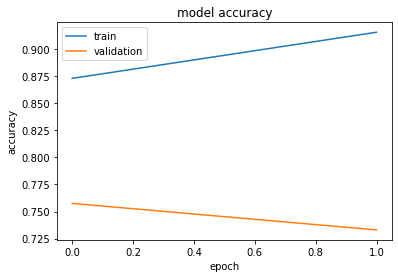

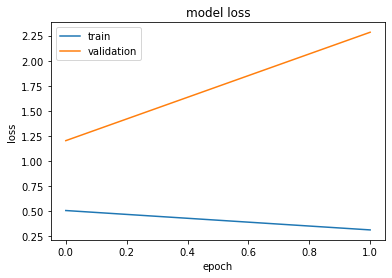

In [55]:
# plot info from model history object 

# list all data in history
print(H.history.keys())

# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [56]:
%tensorboard --logdir logs/fit 

In [20]:
#imp.reload(ml_models)

In [13]:
#account_key = input('input_account_key')

In [21]:
# attach the azure url
#blob_urls = (f"https://{account_name}.blob.core.windows.net/{container_name}/{blob.name}" for blob in blobs_list)

In [20]:
#%%time
#dataset = []
#failed_urls = []
#for blob_url in blob_urls:
    # print(blob_url)
    # select 'png'
#    if 'png' in blob_url:
#        try:
#            image = imageio.imread(blob_url)
#            dataset.append(image)
#        except Exception as e:
#            failed_urls.append(blob_url)
#            pass
        

In [22]:
#print(failed_urls)

In [23]:
#len(dataset)

In [25]:
# show an image

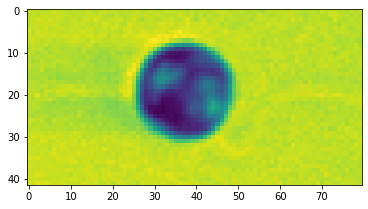

In [43]:
plt.imshow(dataset[0])

In [30]:
dataset[0]

In [15]:
image = imageio.imread('https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151102T161705_IFCB107/IFCB107D20151102T161705P00002.png')

In [17]:
image

Array([[203, 200, 200, ..., 200, 198, 200],
       [199, 200, 198, ..., 195, 199, 194],
       [201, 201, 205, ..., 200, 197, 198],
       ...,
       [205, 203, 207, ..., 197, 197, 197],
       [205, 203, 203, ..., 200, 199, 196],
       [207, 202, 209, ..., 201, 198, 199]], dtype=uint8)